Projeto para classificação de imagens automática de uma loja e-commerce

In [9]:
import tensorflow
from tensorflow import keras
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset Fashion MNIST

In [2]:
(imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste) = keras.datasets.fashion_mnist.load_data()

Explorando os dados

In [3]:
len(imagens_treino)
imagens_treino.shape
len(imagens_teste)
imagens_teste.shape
identificacoes_treino.min()
identificacoes_treino.max()


9

Rotulando as identificações

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                           'Sandália', 'Camisa', 'Tênis', 'Bota', 'Bota']

Vizualizando os dados

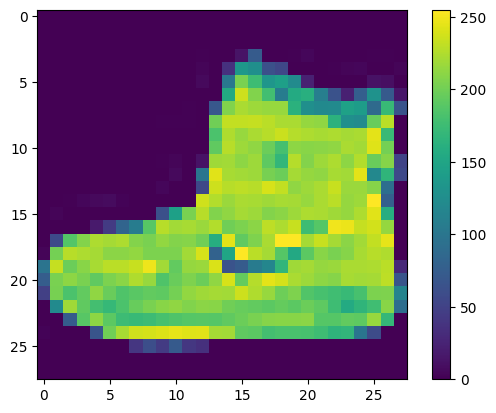

In [5]:
#plt.imshow(imagens_treino[0])
#plt.imshow(identificacoes_treino[1])
'''
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  #plt.xticks([])
  #plt.yticks([])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()


Normalizando as imagens

In [6]:
imagens_treino = imagens_treino/float(255)

Criando, compliando, treinando e normalizando o modelo

In [10]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  #keras.layers.Dense(128, activation=tensorflow.nn.relu),
  #keras.layers.Dense(64, activation=tensorflow.nn.relu),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7632 - loss: 0.6681 - val_accuracy: 0.8543 - val_loss: 0.4070
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8481 - loss: 0.4143 - val_accuracy: 0.8655 - val_loss: 0.3738
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8666 - loss: 0.3681 - val_accuracy: 0.8714 - val_loss: 0.3550
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8730 - loss: 0.3422 - val_accuracy: 0.8793 - val_loss: 0.3350
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8809 - loss: 0.3256 - val_accuracy: 0.8793 - val_loss: 0.3345


Salvando e carregando o modelo

In [11]:
modelo.save('modelo.keras')
modelo_salvo = load_model('modelo.keras', custom_objects={'softmax_v2': tf.nn.softmax})

Visualizando as acurácias de treino e validação por época

[0.8543333411216736,
 0.8654999732971191,
 0.8714166879653931,
 0.8793333172798157,
 0.8793333172798157]

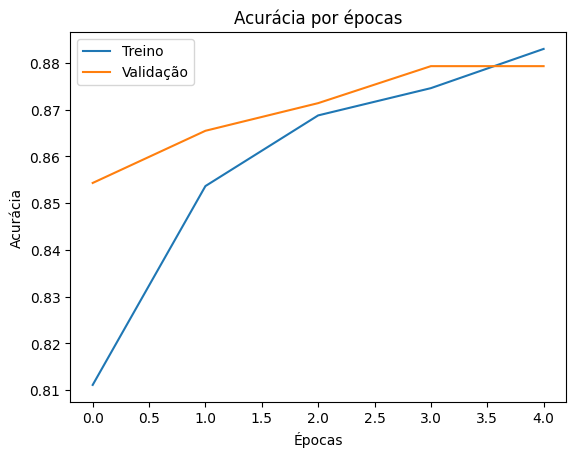

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])
historico.history['val_accuracy']

Visualizando as perdas de treino e validação por época

[0.4069885313510895,
 0.3737584948539734,
 0.3550499975681305,
 0.33502137660980225,
 0.33446192741394043]

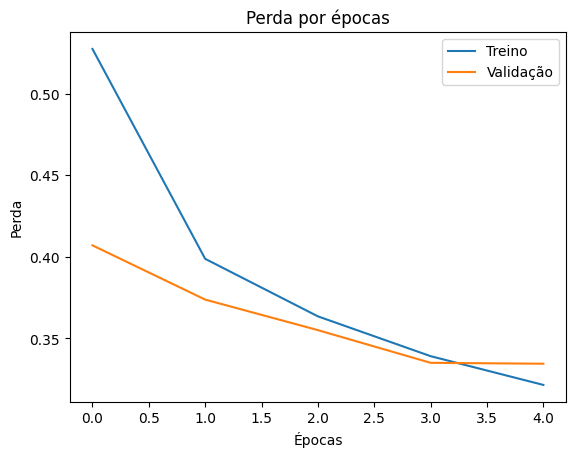

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])
historico.history['val_loss']

Testando o modelo e modelo salvo

In [14]:
testes = modelo.predict(imagens_teste)
print('Resultado teste:',np.argmax(testes[1]))
print('Número da imagem de teste:', identificacoes_teste[1])

teste_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste modelo salvo:',np.argmax(teste_modelo_salvo[1]))
print('Número da imagem de teste:', identificacoes_teste[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resultado teste: 2
Número da imagem de teste: 2
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resultado teste modelo salvo: 2
Número da imagem de teste: 2


Validando o modelo

In [15]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8608 - loss: 56.3385
Perda do teste: 62.143131256103516
Acurácia do teste: 0.8572999835014343


Representando e visualizando a estrutura do modelo

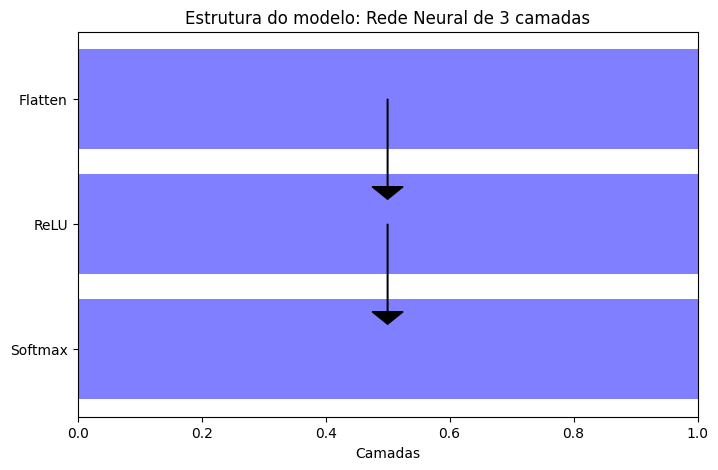

In [16]:
layers = ['Flatten', 'ReLU', 'Softmax']
y_pos = np.arange(len(layers))

plt.figure(figsize=(8, 5))
plt.barh(y_pos, [1]*len(layers), align='center', alpha=0.5, color='blue')
plt.yticks(y_pos, layers)
plt.xlabel('Camadas')
plt.title('Estrutura do modelo: Rede Neural de 3 camadas')

for i in range(len(layers) - 1):
    plt.arrow(0.5, i, 0, 0.7, head_width=0.05, head_length=0.1, fc='black', ec='black')

plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.show()

Representando e visualizando a estrutura do modelo em camadas da rede neural

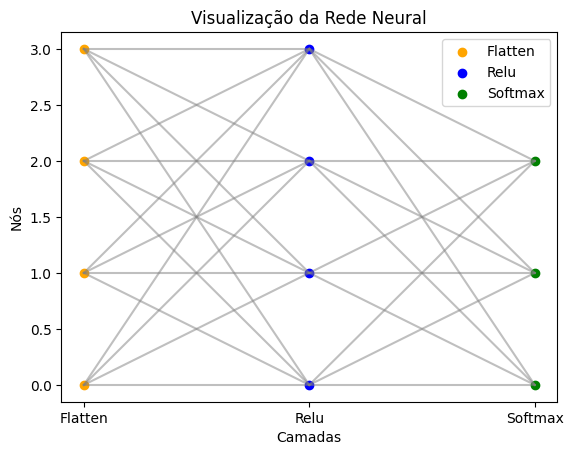

In [17]:
def visualizacao_rede_neural(num_flatten_nodes, num_relu_nodes, num_softmax_nodes):

    flatten_x = [0] * num_flatten_nodes
    flatten_y = [i for i in range(num_flatten_nodes)]
    relu_x = [1] * num_relu_nodes
    relu_y = [i for i in range(num_relu_nodes)]
    softmax_x = [2] * num_softmax_nodes
    softmax_y = [i for i in range(num_softmax_nodes)]

    fig, ax = plt.subplots()

    ax.scatter(flatten_x, flatten_y, color='orange', label='Flatten')
    ax.scatter(relu_x, relu_y, color='blue', label='Relu')
    ax.scatter(softmax_x, softmax_y, color='green', label='Softmax')


    for i in range(num_flatten_nodes):
        for j in range(num_relu_nodes):
            ax.plot([flatten_x[i], relu_x[j]], [flatten_y[i], relu_y[j]], color='gray', alpha=0.5)

    for j in range(num_relu_nodes):
        for k in range(num_softmax_nodes):
            ax.plot([relu_x[j], softmax_x[k]], [relu_y[j], softmax_y[k]], color='gray', alpha=0.5)


    ax.set_xlabel('Camadas')
    ax.set_ylabel('Nós')
    ax.set_title('Visualização da Rede Neural')
    ax.legend()
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Flatten', 'Relu', 'Softmax'])

    plt.show()

visualizacao_rede_neural(num_flatten_nodes=4, num_relu_nodes=4, num_softmax_nodes=3)